In [185]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("Data-sets/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1 = df.drop(columns = ['area_type', 'availability', 'society','balcony'])
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df1.dropna(inplace=True)
df1["No_of_rooms"] = df1["size"].apply(lambda size_text: int(size_text.split(" ")[0]))
df1.head()

,location,size,total_sqft,bath,price,No_of_rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [9]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,No_of_rooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [12]:
def convert_sqft_to_float(x):
    token = x.split("-")
    if(len(token) == 2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
df1["total_sqft"] = df1['total_sqft'].apply(convert_sqft_to_float)

In [14]:
df1.loc[100:150]

,location,size,total_sqft,bath,price,No_of_rooms
100,Yeshwanthpur,3 BHK,2502.00,3.0,138.000,3
101,Chandapura,2 BHK,650.00,1.0,17.000,2
102,Kothanur,3 Bedroom,2400.00,2.0,150.000,3
103,Green View Layout,2 BHK,1007.00,2.0,43.000,2
104,Shantiniketan Layout,2 BHK,1200.00,2.0,50.000,2
105,Peenya,2 BHK,966.00,2.0,49.900,2
106,Nagarbhavi,3 BHK,1630.00,2.0,98.000,3
107,Rajaji Nagar,3 BHK,1640.00,3.0,229.000,3
108,Jalahalli West,2 BHK,782.00,2.0,55.680,2
109,Devanahalli,2 BHK,1260.00,2.0,66.780,2


In [15]:
df1["price_per_sqft"] = df1['price']*100000/df1['total_sqft']
df1.head()

,location,size,total_sqft,bath,price,No_of_rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [16]:
df1.location.count()

13246

In [17]:
df1["location"] = df1.location.apply(lambda x: x.strip())
location_stat = df1.groupby('location')['location'].value_counts().sort_values(ascending= False)

location_stat_less_10 = location_stat[location_stat <= 10]
# location_stat_less_10
df1['location'] = df1.location.apply(lambda x: 'other' if x in location_stat_less_10 else x)
df1.location.head(20)

0     Electronic City Phase II
1             Chikka Tirupathi
2                  Uttarahalli
3           Lingadheeranahalli
4                     Kothanur
5                   Whitefield
6             Old Airport Road
7                 Rajaji Nagar
8                 Marathahalli
9                        other
10                  Whitefield
11                  Whitefield
12          7th Phase JP Nagar
13                   Gottigere
14                    Sarjapur
15                 Mysore Road
16               Bisuvanahalli
17       Raja Rajeshwari Nagar
18                       other
19                       other
Name: location, dtype: object

In [18]:
len(df1.location.unique())

242

In [19]:
df1.shape


(13246, 7)

In [20]:
df1 = df1[~(df1.total_sqft/df1.No_of_rooms < 300)]
df1.head()

,location,size,total_sqft,bath,price,No_of_rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
df1.shape

(12502, 7)

In [22]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [23]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subsf in df.groupby("location"):
        m = np.mean(subsf.price_per_sqft)
        st = np.std(subsf.price_per_sqft)
        reduce_df = subsf[(subsf.price_per_sqft > (m-st)) & (subsf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduce_df],ignore_index= True)
    return df_out

In [24]:
df3 = remove_pps_outliers(df1)
df3.shape

(10241, 7)

In [225]:
def remove_bhk_outliers(df):
    excluded_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_status = {}
        for bhk,bhk_df in df.groupby("No_of_rooms"):
            bhk_status[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('No_of_rooms'):
            stats = bhk_status.get(bhk-2)
            if stats and stats['count']>=5:
                excluded_indices = np.append(excluded_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(excluded_indices, axis="index")

df4 = remove_bhk_outliers(df3)
df4.shape
  
        

(8284, 7)

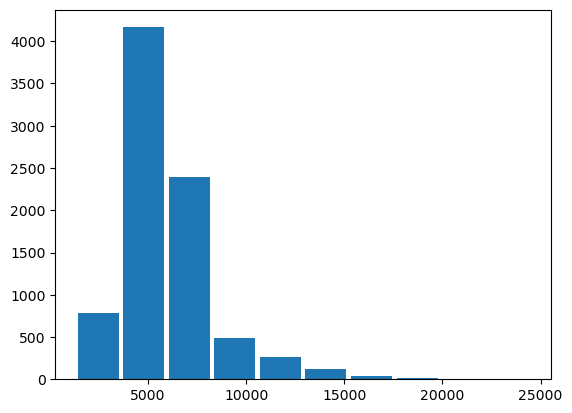

In [227]:
plt.hist(df4.price_per_sqft,rwidth = 0.9);

In [68]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 16., 12., 13.])

In [229]:
df5 = df4[df4.bath < df4.bath+2]
df5.shape

(8284, 7)

In [231]:
df6 = df5.drop(columns=['size','price_per_sqft'])
df6.head()

,location,total_sqft,bath,price,No_of_rooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [233]:
dummies = pd.get_dummies(df6.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
df7 = pd.concat([df6,dummies.drop(columns="other")],axis='columns')
df7.head()

,location,total_sqft,bath,price,No_of_rooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
df7.shape

(8284, 246)

In [239]:
df8 = df7.drop(columns=['location'])
df8.shape

(8284, 245)

# Mode Builiding

Using OneHotEncoding technique


In [241]:
X = df8.drop(columns='price')
y= df8.price
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [243]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8559635620732493

In [245]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x =np.zeros(len(X.columns))
    x[0] = sqft
    x[1]= bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return round(lr_clf.predict([x])[0],3)

In [247]:
predict_price('1st Phase JP Nagar',1000,2,2)

D:\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.703

In [195]:
predict_price('1st Phase JP Nagar',1000,3,3)

D:\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.476

In [257]:
predict_price('Indira Nagar',1000,2,2)

D:\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


158.542

In [259]:
predict_price('Indira Nagar',1000,3,3)

D:\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


170.635

In [253]:
predict_price("Uttarahalli",1440,2,3)

D:\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.253

In [255]:
X.columns

Index(['total_sqft', 'bath', 'No_of_rooms', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [261]:
import pickle
with open('banglore_home_prices_model.pickle', "wb") as f:
    pickle.dump(lr_clf,f)

In [263]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))